In [13]:
import io
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

In [14]:
image_pixels = io.imread("vscode.png")
image_pixels.shape

(650, 1024, 4)

In [15]:
if image_pixels.shape[-1] == 4:
    image_pixels = image_pixels[..., :3]  # discard alpha

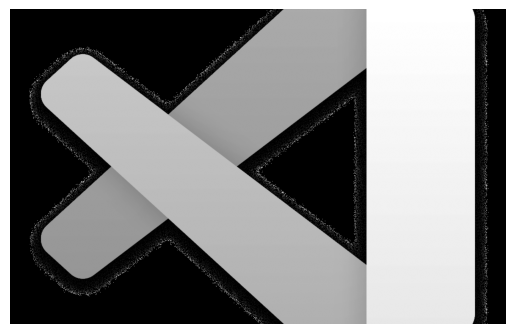

In [16]:
gray_img = color.rgb2gray(image_pixels)
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()

In [17]:
edge_sobel = filters.sobel(gray_img)
edge_sobel.shape

(650, 1024)

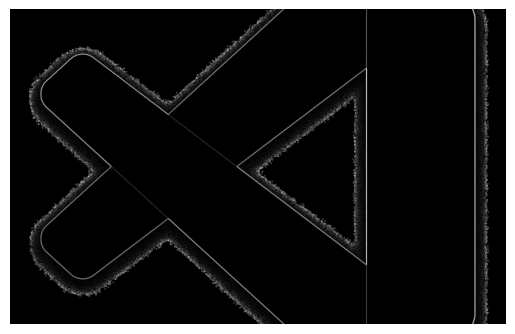

In [18]:
from skimage.util import img_as_ubyte

io.imsave("edge_sobel.png", img_as_ubyte(edge_sobel))

plt.imshow(edge_sobel, cmap="gray")
plt.axis("off")
plt.show()

In [35]:
threshold = 0.2
edges = edge_sobel > threshold
edges[200:225, 300:325]

array([[False, False, False,  True,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False,  True,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False,  True,  True,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False,  True,
         True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],


In [20]:
edge_pixel_indices = np.nonzero(edges)
edge_pixel_indices

(array([  0,   0,   0, ..., 649, 649, 649], shape=(8676,)),
 array([563, 564, 954, ..., 955, 984, 986], shape=(8676,)))

In [21]:
edges[104,572]

np.False_

In [22]:
edge_points = np.column_stack(np.nonzero(edges))
edge_points[:3]

array([[  0, 563],
       [  0, 564],
       [  0, 954]])

In [23]:
contours = measure.find_contours(edges, level=0.5)
contours

[array([[0.000e+00, 5.645e+02],
        [5.000e-01, 5.640e+02],
        [1.000e+00, 5.635e+02],
        [1.500e+00, 5.630e+02],
        [2.000e+00, 5.625e+02],
        [2.500e+00, 5.620e+02],
        [3.000e+00, 5.615e+02],
        [3.500e+00, 5.610e+02],
        [4.000e+00, 5.605e+02],
        [4.500e+00, 5.600e+02],
        [5.000e+00, 5.595e+02],
        [5.500e+00, 5.590e+02],
        [6.000e+00, 5.585e+02],
        [6.500e+00, 5.580e+02],
        [7.000e+00, 5.575e+02],
        [7.500e+00, 5.570e+02],
        [8.000e+00, 5.565e+02],
        [8.500e+00, 5.560e+02],
        [9.000e+00, 5.555e+02],
        [9.500e+00, 5.550e+02],
        [1.000e+01, 5.545e+02],
        [1.050e+01, 5.540e+02],
        [1.100e+01, 5.535e+02],
        [1.150e+01, 5.530e+02],
        [1.150e+01, 5.520e+02],
        [1.200e+01, 5.515e+02],
        [1.250e+01, 5.510e+02],
        [1.300e+01, 5.505e+02],
        [1.350e+01, 5.500e+02],
        [1.400e+01, 5.495e+02],
        [1.450e+01, 5.490e+02],
        